<a href="https://colab.research.google.com/github/roxoho/tensorflow-keras-practice/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42

np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 [==============================] - 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    "Average Number of Rooms": 5,
}

X_train_1d = X_train[:, boston_features["Average Number of Rooms"]]
print(X_train_1d.shape)

X_test_1d = X_test[:, boston_features["Average Number of Rooms"]]

(404,)


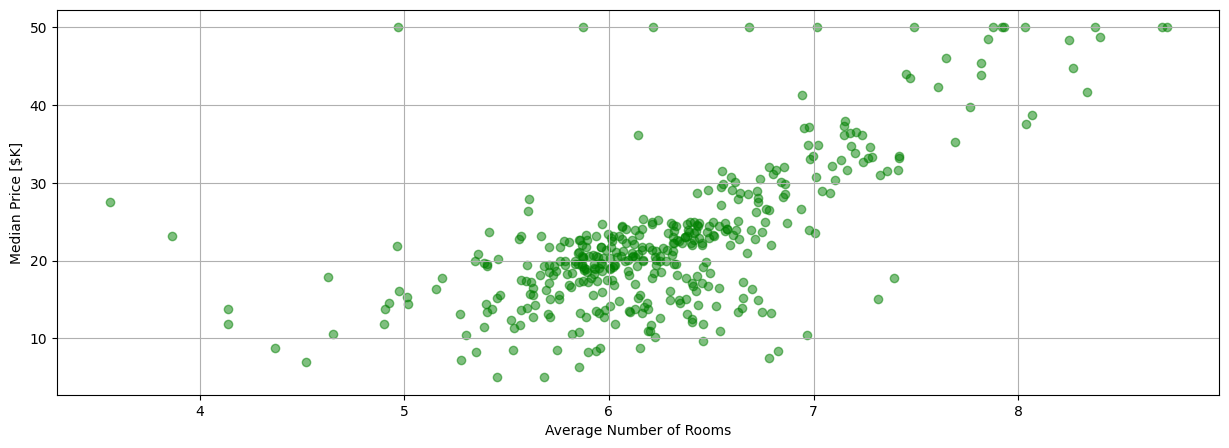

In [5]:
plt.figure(figsize=(15, 5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color="green", alpha=0.5)

In [6]:
model = Sequential()

# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))

# Display a summary of the model architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss="mse")

In [8]:
history = model.fit(
    X_train_1d,
    y_train,
    batch_size=16,
    epochs=101,
    validation_split=0.3,
)

Epoch 1/101
18/18 [==============================] - 1s 19ms/step - loss: 589.4066 - val_loss: 662.8199
Epoch 2/101
18/18 [==============================] - 0s 6ms/step - loss: 555.8239 - val_loss: 630.8760
Epoch 3/101
18/18 [==============================] - 0s 5ms/step - loss: 527.1360 - val_loss: 601.1273
Epoch 4/101
18/18 [==============================] - 0s 5ms/step - loss: 499.8829 - val_loss: 572.1542
Epoch 5/101
18/18 [==============================] - 0s 5ms/step - loss: 473.1080 - val_loss: 543.5894
Epoch 6/101
18/18 [==============================] - 0s 5ms/step - loss: 447.2101 - val_loss: 516.2472
Epoch 7/101
18/18 [==============================] - 0s 5ms/step - loss: 422.3209 - val_loss: 489.4754
Epoch 8/101
18/18 [==============================] - 0s 5ms/step - loss: 398.3815 - val_loss: 464.2188
Epoch 9/101
18/18 [==============================] - 0s 5ms/step - loss: 375.2371 - val_loss: 439.2292
Epoch 10/101
18/18 [==============================] - 0s 6ms/step - loss

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

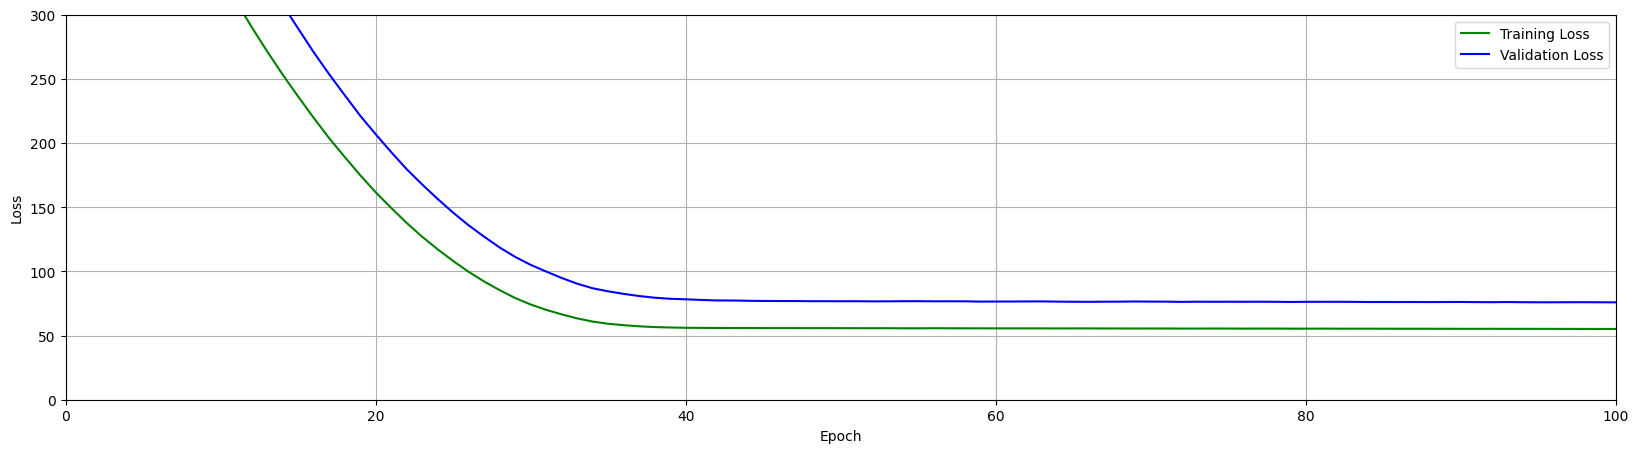

In [10]:
plot_loss(history)

In [11]:
x = [3, 4, 5, 6, 7]
y_pred = model.predict(x)
for idx in range(len(x)):
    print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 213ms/step
Predicted price of a home with 3 rooms: $11.8K
Predicted price of a home with 4 rooms: $15.0K
Predicted price of a home with 5 rooms: $18.2K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.6K


In [12]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3, 9, 10)

# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 261ms/step


In [13]:
def plot_data(x_data, y_data, x, y, title=None):

    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

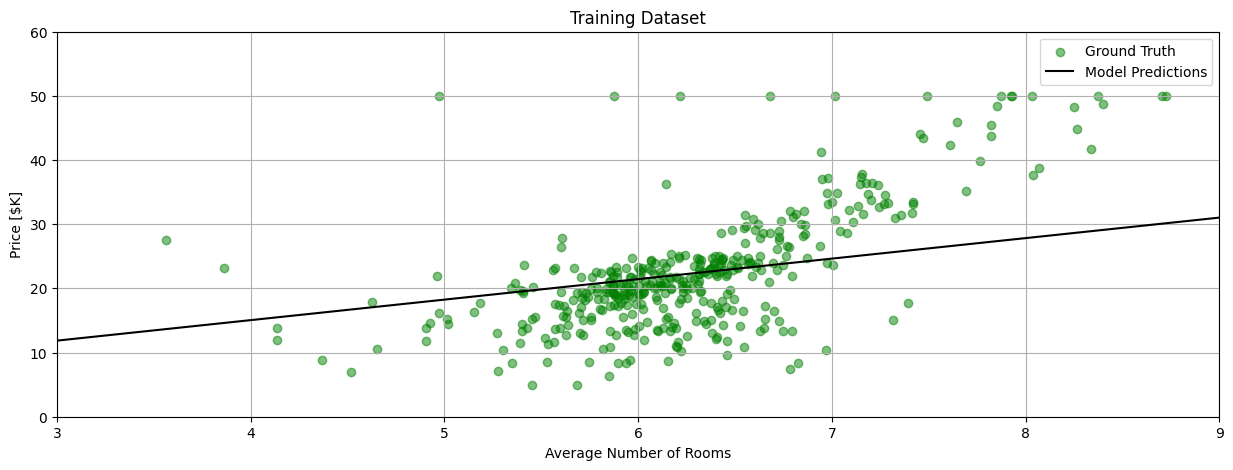

In [14]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

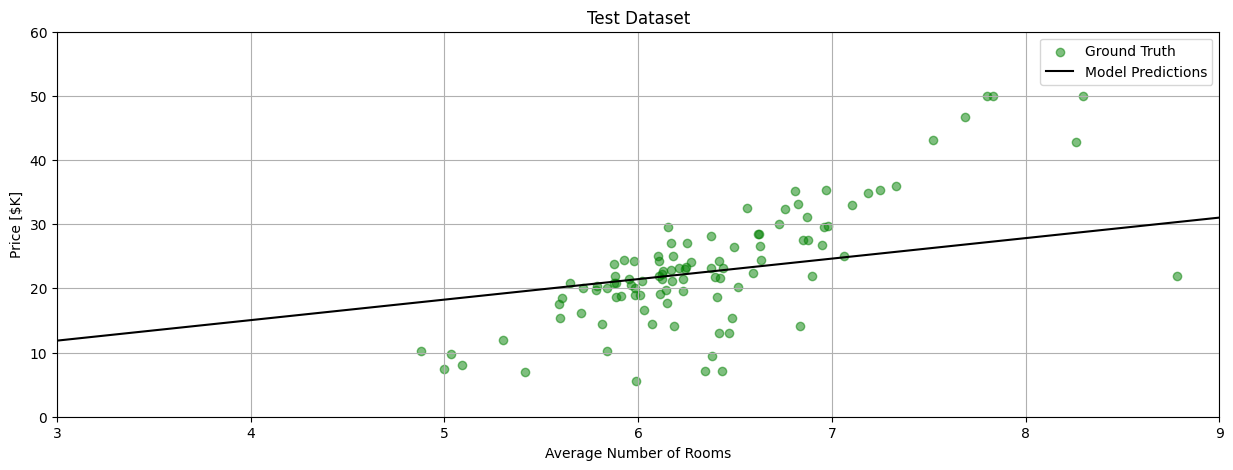

In [15]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')